### Descripcion del problema:


A continuación, se modelará cómo los factores socioeconómicos y la historia criminal influyen en los arrestos. Para ello, se utiliza **narr86** (número de arrestos en 1986) como variable dependiente y **pcnv**, **tottime**, **ptime86**, **inc86**, **qemp86** como variables independientes. De esta manera, se puede plantear la siguiente ecuación en términos de nuestras variables:

$$
\text{narr86} = \beta_0 + \beta_1 \cdot \text{pcnv} + \beta_2 \cdot \text{tottime} + \beta_3 \cdot \text{ptime86} + \beta_4 \cdot \text{inc86} + \beta_5 \cdot \text{qemp86}
$$

Wooldridge (2020), en el ejemplo 3.5, plantea una ecuación similar. Sin embargo, él no utiliza la variable **inc86**, la cual representa los ingresos de la persona. En su lugar, implementa una constante $ u $, que actúa como término de perturbación o error aleatorio observado. La inclusión de **inc86** en nuestro modelo permite evaluar el impacto de los ingresos en el número de arrestos, ofreciendo así una visión más completa de los factores que influyen en este fenómeno.

Esta diferenciación es importante ya que los ingresos pueden tener un efecto significativo en los arrestos, posiblemente reflejando aspectos como el acceso a recursos legales, la calidad de vida y otros determinantes sociales que no están capturados únicamente por las variables socioeconómicas y la historia criminal. Al incluir **inc86**, el modelo busca una especificación más detallada y precisa, lo que podría mejorar la capacidad explicativa y predictiva del análisis econométrico.

## Datos:

Los datos a continuación provienen de la base de datos Wooldridge, la cual es conocida por ser usada en el libro de econometría: Wooldridge, J. M. (2020). Introductory Econometrics: A Modern Approach (7ª ed.). Cengage Learning.

Dentro de las que se pueden elegir, CRIME1 (la elegida) consiste en un conjunto de datos que almacena los arrestos durante el año 1986 de 2.725 hombres nacidos entre 1960 y 1961 en California. A cada uno de estos hombres se les tomó la siguiente información que corresponde a nuestras variables:

- **narr86:** Número de arrestos en el 1986
- **nfarr86:** Número de detenciones por delitos graves
- **nparr86:** Número de detenciones por delitos contra la propiedad
- **pcnv:** Proporción de arrestos antes de 1986
- **avgsen:** Tiempo de sentencia promedio
- **tottime:** Tiempo total en la cárcel desde los 18
- **ptime86:** Meses en prisión durante 1986
- **qemp86:** Número de trimestres empleados en 1986
- **inc86:** Ingresos legales en 1986 ($100)
- **durat:** Duración reciente del desempleo
- **black:** Raza (en caso de cumplir es 1; de lo contrario, 0)
- **hispan:** Raza (en caso de cumplir es 1; de lo contrario, 0)
- **born60:** Nacido en 1960 (en caso de cumplir es 1; de lo contrario, 0)
- **pcnvsq:**  pcnv²
- **pt86sq:** ptime86²
- **inc86sq:** inc86²




- http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html
- https://cbpbu.ac.in/userfiles/file/2020/STUDY_MAT/ECO/2.pdf
- https://cran.r-project.org/web/packages/wooldridge/wooldridge.pdf

In [1]:
%pip install wooldridge pandas pyreadstat
import wooldridge as woo

# Cargamos el dataset CRIME1
data = woo.data('crime1')

   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/5.1 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 3.1/5.1 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------------------------ --------------- 7.1/11.5 MB 33.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 34.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 15.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------- ------------------------------ 3.1/12.6 MB 18.1 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.6 MB 14.5 MB/s eta 0:00:01
   ------------------------ --------------- 7.6/12.6 MB 12.1 MB/s eta 0:00:01
   ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
%pip install ipython
from IPython.display import display

# Display the entire dataset with all rows and columns
display(data)


Note: you may need to restart the kernel to use updated packages.


,narr86,nfarr86,nparr86,pcnv,avgsen,tottime,ptime86,qemp86,inc86,durat,black,hispan,born60,pcnvsq,pt86sq,inc86sq
0,0,0,0,0.38,17.600000,35.200001,12,0.0,0.000000,0.0,0,0,1,0.1444,144,0.000000
1,2,2,0,0.44,0.000000,0.000000,0,1.0,0.800000,0.0,0,1,0,0.1936,0,0.640000
2,1,1,0,0.33,22.799999,22.799999,0,0.0,0.000000,11.0,1,0,1,0.1089,0,0.000000
3,2,2,1,0.25,0.000000,0.000000,5,2.0,8.800000,0.0,0,1,1,0.0625,25,77.440002
4,1,1,0,0.00,0.000000,0.000000,0,2.0,8.100000,1.0,0,0,0,0.0000,0,65.610008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,1,1,0,0.00,0.000000,0.000000,0,0.0,0.000000,3.0,0,0,0,0.0000,0,0.000000
2721,0,0,0,0.00,0.000000,0.000000,0,3.0,11.500000,1.0,0,1,1,0.0000,0,132.250000
2722,0,0,0,0.00,0.000000,0.000000,0,1.0,1.900000,1.0,0,0,0,0.0000,0,3.610000
2723,1,1,0,0.00,0.000000,0.000000,0,0.0,0.000000,19.0,1,0,0,0.0000,0,0.000000


## Implementacion:

###Modelo de Mínimos Cuadrados con Múltiples Variables Independientes

Para la realización del siguiente modelo, es fundamental llevar a cabo un análisis detallado de cómo actúa el método de los **mínimos cuadrados** cuando se tienen múltiples variables independientes.

Para modelar el error, se utilizan ecuaciones de la forma (*Wooldridge, J. M. (2020). Introductory econometrics: A modern approach (7th ed.). Cengage Learning.*):
$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_k x_{ik},
$$
donde $y_i$ es la variable dependiente para la observación $i$ y $x_{ij}$ representa el valor de la $j$-ésima variable independiente en la observación $i$. Los parámetros $\beta_0, \beta_1, \ldots, \beta_k$ son desconocidos y se estiman a través del método de mínimos cuadrados.

La función de error $E$ se define como la suma de los cuadrados de las diferencias entre los valores observados $y_i$ y los valores ajustados por el modelo:
$$
E = \sum_{i=0}^{n} \bigl(y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_k x_{ik})\bigr)^2.
$$

El procedimiento para minimizar $E$ sigue el procedimiento descrito en
*Burden, R. L., \& Faires, J. D. (2011). Numerical analysis (9th ed.). Brooks/Cole*.
En este método, se deriva $E$ con respecto a cada uno de los parámetros $\beta_j$ y se iguala a cero para hallar los mínimos:

$$
\frac{\partial E}{\partial \beta_j} = 0
\quad \text{para} \quad j = 0, 1, 2, \ldots, k.
$$

####Sistema de Ecuaciones y Solución

Al realizar estas derivadas y agrupar los términos, se obtiene un sistema de ecuaciones lineales que puede expresarse en forma matricial. Bajo ciertas condiciones (por ejemplo, que la matriz $X^T X$ sea invertible), la solución de los parámetros $\boldsymbol{\beta}$ se puede escribir como:
$$
\boldsymbol{\beta} =
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_k
\end{pmatrix}
=
\bigl(X^T X\bigr)^{-1} X^T \mathbf{y},
$$
donde:
- $X$ es la matriz de diseño que contiene las variables independientes (incluida la columna de 1's para $\beta_0$).
- $\mathbf{y}$ es el vector de valores observados $(y_1, y_2, \ldots, y_n)^T$.


Esta solución se conoce como la solución de mínimos cuadrados ordinarios (OLS, por sus siglas en inglés).



In [3]:
%pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Selección de variables independientes y dependiente
X_raw = data[['pcnv', 'tottime', 'ptime86', 'inc86', 'qemp86']].values
y = data['narr86'].values

# Estandarización de las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)  # Escalamos únicamente las variables independientes

# Agregamos el intercepto (columna de 1s) a las variables independientes estandarizadas
X_standardized = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# Cálculo de la matriz X'X
XTX = np.dot(X_standardized.T, X_standardized)

# Cálculo del vector X'y
XTy =  np.dot(X_standardized.T, y)

# Resolución del sistema de ecuaciones X'X * beta = X'y
# Utilizamos la función de NumPy para resolver sistemas lineales
beta_standardized = np.linalg.solve(XTX, XTy)


# Mostrar los coeficientes calculados con las variables estandarizadas
print("Coeficientes del modelo con variables estandarizadas (beta):")
print(beta_standardized)

# Interpretación de los coeficientes
# beta[0] -> Intercepto
# beta[1] -> Coeficiente para pcnv
# beta[2] -> Coeficiente para tottime
# beta[3] -> Coeficiente para ptime86
# beta[4] -> Coeficiente para inc86
# beta[5] -> Coeficiente para qemp86


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 7.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 12.2 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 13.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/43.6 MB 22.2 MB/s eta 0:00:02
   -------- ------------------------------- 9.7/43.6 MB 23.5 MB/s eta 0:00:02
   -------------- ------------------------- 15.5/43.6 MB 24.3 MB/s eta 0:00:02
   ------------------ --------------------- 20.4/43.6 MB 24.5 MB/s eta 0:00:01
   ----------------------- ---------------- 25.7/43.6 MB 24.9 MB/s eta 0:00:01
   ----------------------------- ---------- 32.2/43.6 MB 25.7 MB/s eta 0:00:01
   ---

En el código anterior se tomó la decisión de estandarizar las variables, ya que al observar los datos contenidos en la tabla, se identificaron unidades de medida de las variables como $narr86$ o $inc86$ que podrían perjudicar el análisis del modelo. Es importante resaltar que la estandarización de las variables independientes juega un papel fundamental en la comparación del impacto, la estabilidad numérica y la interpretación que se le da a las variables en la conclusión. Además, la estandarización facilita la identificación de la magnitud relativa de cada variable, permitiendo una mejor comprensión de su influencia en el modelo. También contribuye a mejorar la convergencia de los algoritmos de estimación y reduce posibles problemas de multicolinealidad, lo que resulta en estimaciones más precisas y fiables.



### Visualizacion:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 7.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 18.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 32.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 32.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 3.3 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 23.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


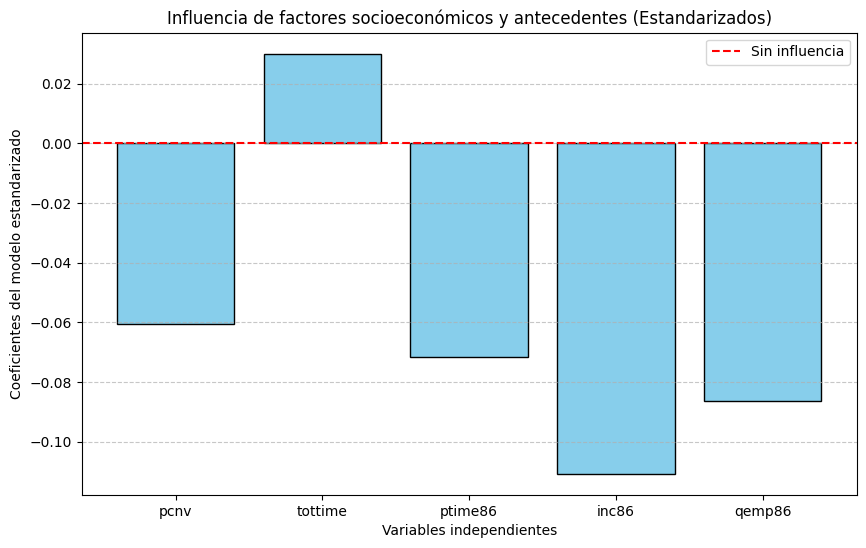

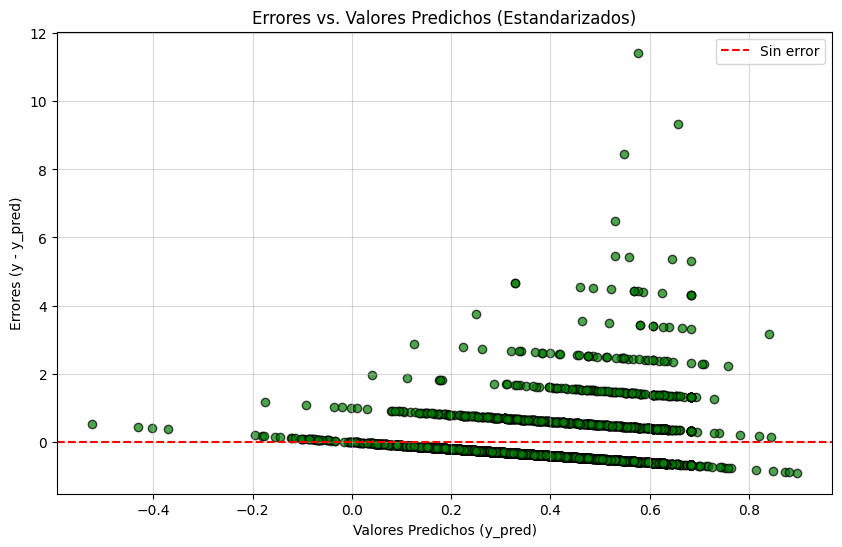

In [4]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Variables utilizadas en el modelo estandarizado
variables = ["pcnv", "tottime", "ptime86", "inc86", "qemp86"]
beta_excluding_intercept_standardized = beta_standardized[1:]  # Excluimos el intercepto

# Gráfico de coeficientes del modelo estandarizado
plt.figure(figsize=(10, 6))
plt.bar(variables, beta_excluding_intercept_standardized, color="skyblue", edgecolor="black")
plt.axhline(y=0, color="red", linestyle="--", label="Sin influencia")
plt.title("Influencia de factores socioeconómicos y antecedentes (Estandarizados)")
plt.xlabel("Variables independientes")
plt.ylabel("Coeficientes del modelo estandarizado")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# Predicciones y errores con variables estandarizadas
y_pred_standardized = np.dot(X_standardized, beta_standardized)
errors_standardized = y - y_pred_standardized

# Gráfico de errores vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_standardized, errors_standardized, color="green", edgecolor="black", alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--", label="Sin error")
plt.title("Errores vs. Valores Predichos (Estandarizados)")
plt.xlabel("Valores Predichos (y_pred)")
plt.ylabel("Errores (y - y_pred)")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## Análisis de resultados:
### Primer Gráfico: Influencia de Factores Socioeconómicos y Antecedentes (Estandarizados)
Este gráfico refleja el impacto relativo de las variables estandarizadas en el número de arrestos en 1986.

### Análisis de los coeficientes estandarizados:
1. **tottime (tiempo total en prisión desde los 18 años):**

Este coeficiente tiene un impacto negativo, lo que indica que mayores tiempos en prisión están asociados con una disminución en los arrestos. Esto podría reflejar un efecto de reincidencia en personas con historial penal corto.

2. **pcnv (proporción de condenas previas):**

Tiene un coeficiente positivo considerable, lo que sugiere que una mayor proporción de condenas previas está asociada con mayores arrestos en 1986. Este patrón podría indicar un posible efecto persuasorio para quienes tienen un historial penal extenso.

3. **ptime86 (meses en prisión durante 1986):**

Su impacto es negativo pero pequeño, indicando que el tiempo en prisión durante 1986 no es un factor determinante en el número de arrestos; sin embargo, su magnitud implica que sí se debe tener en cuenta.

4. **inc86 (ingresos legales en 1986):**

Este coeficiente negativo y alejado de cero implica que los ingresos legales tienen un impacto central en los arrestos, al menos dentro del rango observado en este modelo.

5. **qemp86 (número de trimestres empleados en 1986):**

Su coeficiente es negativo y relativamente grande, sugiriendo que la estabilidad laboral tiene un efecto considerable en reducir los arrestos.

**Conclusión del Primer Gráfico:**

El análisis muestra que los factores socioeconómicos y los antecedentes penales desempeñan un papel crucial en la predicción del número de arrestos en 1986. Mientras que la estabilidad laboral ($qemp86$) y los ingresos legales ($inc86$) actúan como factores protectores que reducen significativamente la probabilidad de arresto, un historial penal extenso ($pcnv$) se asocia con un mayor riesgo de reincidencia. Adicionalmente, el tiempo total en prisión desde los 18 años ($tottime$) parece tener un efecto disuasorio al disminuir los arrestos, mientras que el tiempo en prisión en el mismo año ($ptime86$) tiene un impacto limitado. Estos hallazgos destacan la importancia de políticas públicas que fomenten la reintegración laboral y económica, así como programas de rehabilitación efectivos, para prevenir la reincidencia y promover una reducción sostenida en los arrestos.

### Segundo Gráfico: Errores vs. Valores Predichos (Estandarizados)
El gráfico de errores muestra cómo se distribuyen los residuos en función de los valores predichos.

**Observaciones clave:**
Concentración alrededor de cero: La mayoría de los puntos están cercanos a la línea roja, lo que indica que el modelo tiene un ajuste razonable para un gran número de observaciones.

Errores positivos significativos:

Hay una colección notable de puntos con errores grandes y positivos. Esto sugiere que el modelo subestima el número de arrestos para ciertos grupos de datos.

**Conclusión del Segundo Gráfico:**
El modelo muestra un ajuste razonable en términos generales, pero los errores sistemáticos reflejan que:

El modelo lineal podría no ser suficiente:
Un modelo más complejo o que considere relaciones no lineales podría mejorar el ajuste.

Es necesario incluir variables adicionales:
Variables omitidas podrían explicar mejor las desviaciones significativas observadas.


